In [1]:

isLocalServer = True
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID-model/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print(f'isLocalServer is {isLocalServer}')
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

        # print("System path as follows:")
        # for path in sys.path:
        #     print(f"{path}")

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd
!nvidia-smi

zsh:1: command not found: nvidia-smi
isLocalServer is False
/Volumes/ssd/code/FaceID_model_rebuild


In [29]:
import torch.nn as nn
import torch.optim as optim
from model import build_model, load_dataloader
dataloader_train = load_dataloader('train')
dataloader_val = load_dataloader('val')
dataloader_test = load_dataloader('test')

dataloaders_train = {
    "train": dataloader_train,
    "val": dataloader_val
    }

dataloaders_test = {
    "test": dataloader_test
}

model = build_model(cfg["model"])
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

from model import runner
model, train_res_mat, val_res_mat = runner(
    model,
    ["train", "val"],
    loss_fn,
    optimizer,
    scheduler,
    dataloaders_train,
    num_epochs=20
    )

Epoch 0/19
train Loss: 1.3829 Acc: 0.3871 recall: 0.3878 Precision: 0.5053 avg_prob: 0.2566
val Loss: 1.3814 Acc: 0.5063 recall: 0.5421 Precision: 0.6573 avg_prob: 0.2570
Epoch 1/19
train Loss: 1.3797 Acc: 0.6452 recall: 0.6372 Precision: 0.7669 avg_prob: 0.2578
val Loss: 1.3787 Acc: 0.6962 recall: 0.7419 Precision: 0.8013 avg_prob: 0.2588
Epoch 2/19
train Loss: 1.3765 Acc: 0.8208 recall: 0.8096 Precision: 0.8744 avg_prob: 0.2605
val Loss: 1.3759 Acc: 0.8228 recall: 0.8626 Precision: 0.8845 avg_prob: 0.2611
Epoch 3/19
train Loss: 1.3732 Acc: 0.8996 recall: 0.8888 Precision: 0.9168 avg_prob: 0.2635
val Loss: 1.3730 Acc: 0.8608 recall: 0.8942 Precision: 0.9006 avg_prob: 0.2637
Epoch 4/19
train Loss: 1.3698 Acc: 0.9211 recall: 0.9107 Precision: 0.9321 avg_prob: 0.2669
val Loss: 1.3701 Acc: 0.8987 recall: 0.9259 Precision: 0.9202 avg_prob: 0.2665
Epoch 5/19
train Loss: 1.3664 Acc: 0.9283 recall: 0.9185 Precision: 0.9380 avg_prob: 0.2703
val Loss: 1.3673 Acc: 0.9367 recall: 0.9537 Precision

20 4
0


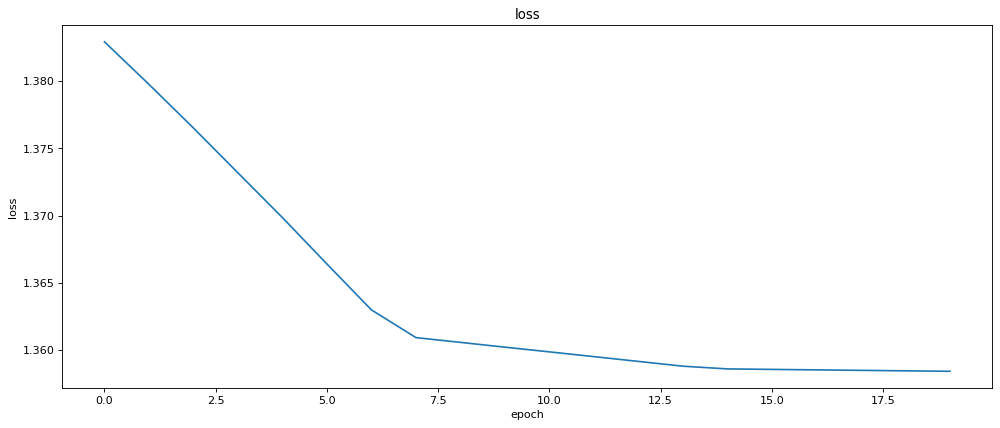

1


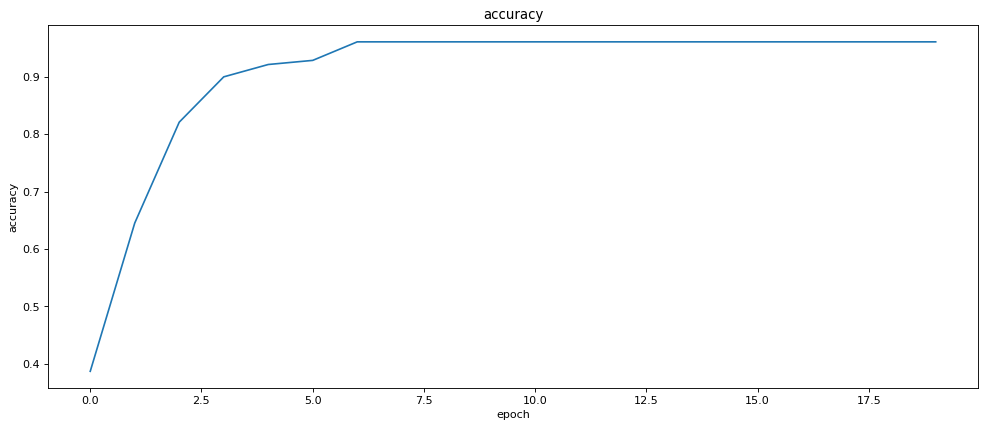

2


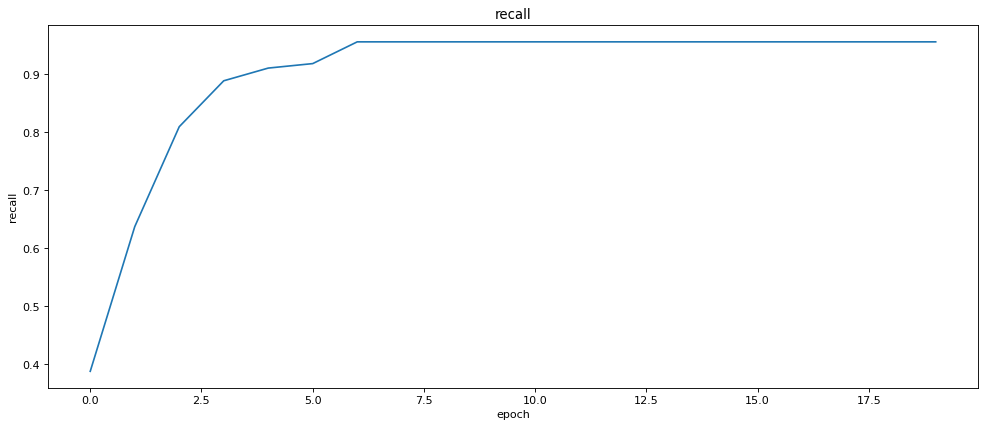

3


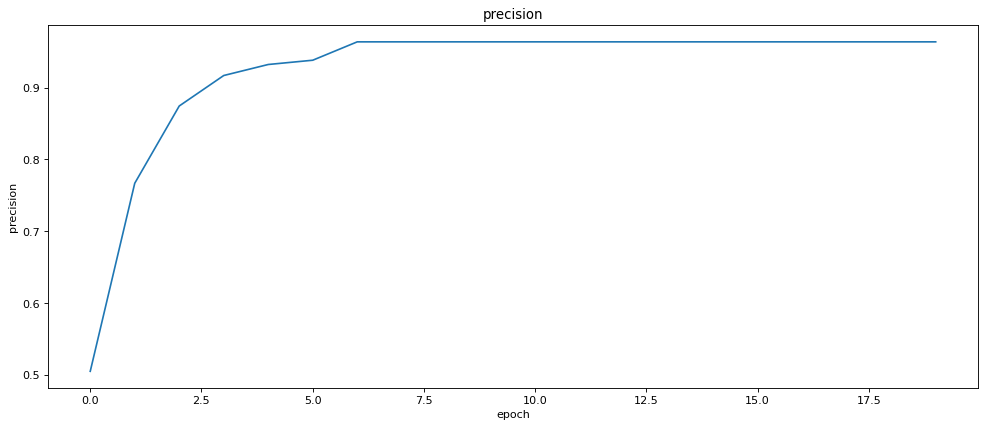

In [30]:
import matplotlib.pyplot as plt
train_evaluation_numpy = train_res_mat
# print(train_evaluation_numpy)

num_epochs, num_evaluations = train_evaluation_numpy.shape
print(num_epochs, num_evaluations)


title_list = ['loss', 'accuracy', 'recall', 'precision']
for col, title in zip(range(0, num_evaluations), title_list):
  plt.figure(figsize=(15, 6), dpi=80)
  plt.title(title)
  plt.ylabel(title)
  plt.xlabel('epoch')
  print(col)
  plt.plot(range(0, num_epochs), train_evaluation_numpy[:, col])
  plt.show()

In [31]:
runner(
    model,
    ["test"],
    loss_fn,
    optimizer,
    scheduler,
    dataloaders_test,
    )

Epoch 0/0
test Loss: 1.3621 Acc: 0.9512 recall: 0.9545 Precision: 0.9615 avg_prob: 0.2751
----------------------------------------------------------------------
Training complete in 0m 0s
there is no return value becasue of test mode


In [32]:
import torch

source_path = './data'
path_for_model = os.path.join(source_path, 'face-classifier-model.pt')

try: 
  torch.save(model.state_dict(), path_for_model)
  print(f'successfully saved model in {path_for_model}')
except:
  print(f'failed saving model in {path_for_model}')

successfully saved model in ./data/face-classifier-model.pt
